task7_sales_summary

Sales Summary:
  product  total_qty  revenue
0   Apple         90    225.0
1  Banana        180    180.0
2  Orange        150    270.0


<Figure size 800x500 with 0 Axes>

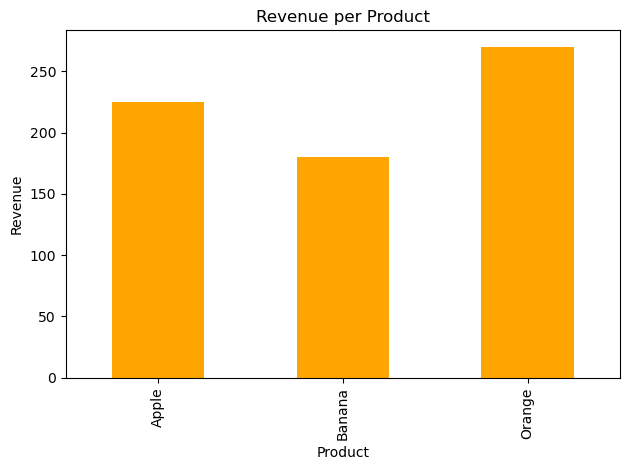

In [6]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create a new SQLite database and connect to it
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# 2. Create a sales table (only if it doesn't already exist)
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# 3. Insert sample data
sample_data = [
    ('Apple', 10, 2.5),
    ('Banana', 20, 1.0),
    ('Orange', 15, 1.8),
    ('Apple', 5, 2.5),
    ('Banana', 10, 1.0),
    ('Orange', 10, 1.8)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# 4. Run SQL query to get total quantity and revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# 5. Print the result
print("Sales Summary:")
print(df)

# 6. Plot bar chart for revenue per product
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Revenue per Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

# 7. Save the plot
plt.savefig("sales_chart.png")
plt.show()

# 8. Close the connection
conn.close()
